In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("fraudTrain.csv")

In [6]:
df.head

<bound method NDFrame.head of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann 

In [7]:
df.groupby(['is_fraud','category']).agg({'amt':'mean', 'category':'count'}).sort_values('amt', ascending=False)

amt  category
is_fraud category                            
1        shopping_net    999.254939      1713
         shopping_pos    876.921815       843
         misc_net        797.012852       915
         entertainment   503.535579       233
         grocery_pos     311.989616      1743
         home            257.432626       198
         misc_pos        218.284080       250
         food_dining     120.076954       151
0        grocery_pos     114.172234    121895
         travel          111.798920     40391
         shopping_pos     73.977575    115829
         shopping_net     72.142606     95830
         misc_net         70.359176     62372
         gas_transport    63.675782    131041
         entertainment    63.118913     93781
         misc_pos         62.401757     79405
         home             57.949319    122917
         kids_pets        57.620386    112796
         health_fitness   54.234775     85746
         grocery_net      53.792817     45318
         food_dining      50.972816     91310
         personal_care    48.020643     90538
1        personal_care    26.170545       220
         health_fitness   20.248421       133
         kids_pets        18.121674       239
         gas_transport    12.288204       618
         grocery_net      12.162836       134
         travel            9.064569       116

In [9]:
df.groupby(['is_fraud']).agg({'amt':'mean'}).reset_index().rename(columns={'amt':'avg_amt'})

,is_fraud,avg_amt
0,0,67.667110
1,1,531.320092


In [11]:
df_train = pd.concat([df[df['is_fraud']==1].sample(frac=0.1, replace=False), 
                      df[df['is_fraud']==0].sample(frac=0.01, replace=False)], 
                    axis=0)
df_train = df_train.sample(frac = 1, replace=False)
df_train = df_train.reset_index(drop=True)

In [12]:
df_train['is_fraud'].value_counts()


is_fraud
0    12892
1      751
Name: count, dtype: int64

In [13]:
dropped_colnames = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 
                    'first', 'last', 'street', 'zip',
                    'trans_num', 'unix_time']
df_train = df_train.drop(columns=dropped_colnames)
df_train['dob_year'] = pd.DatetimeIndex(df_train['dob']).year
df_train['dob_month'] = pd.DatetimeIndex(df_train['dob']).month
df_train = df_train.drop(columns=['dob'])

In [14]:
df_train.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,dob_year,dob_month
0,fraud_Upton PLC,entertainment,106.31,F,Pecos,TX,31.4467,-103.5791,12747,"Merchandiser, retail",30.721567,-103.269042,0,1987,5
1,fraud_Berge LLC,gas_transport,64.70,F,Scotland,MD,38.0828,-76.3477,313,Insurance underwriter,37.303817,-75.471512,0,1976,3
2,"fraud_Becker, Harris and Harvey",personal_care,9.17,F,Newhall,CA,34.3795,-118.5230,34882,Health physicist,35.261990,-118.021036,0,1971,4
3,fraud_Kutch-Wilderman,home,141.24,F,Tulsa,OK,36.2395,-95.9596,413574,Bookseller,37.153721,-95.674669,0,1968,6
4,"fraud_Yost, Schamberger and Windler",kids_pets,8.41,F,Wetmore,MI,46.3535,-86.6345,765,Immunologist,45.362376,-86.324081,0,1972,6


In [15]:
df_train_encoded = pd.get_dummies(df_train)

In [16]:
df_train_encoded.shape

(13643, 2131)

In [17]:
X,y = df_train_encoded.drop(columns=['is_fraud']).copy(), df_train_encoded['is_fraud']
X

,amt,lat,long,city_pop,merch_lat,merch_long,dob_year,dob_month,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,106.31,31.4467,-103.5791,12747,30.721567,-103.269042,1987,5,False,False,...,False,False,False,False,False,False,False,False,False,False
1,64.70,38.0828,-76.3477,313,37.303817,-75.471512,1976,3,False,False,...,False,False,False,False,False,False,False,False,False,False
2,9.17,34.3795,-118.5230,34882,35.261990,-118.021036,1971,4,False,False,...,False,False,False,False,False,False,False,False,False,False
3,141.24,36.2395,-95.9596,413574,37.153721,-95.674669,1968,6,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.41,46.3535,-86.6345,765,45.362376,-86.324081,1972,6,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13638,6.01,40.1959,-92.4333,805,39.888899,-93.023740,1970,6,False,False,...,False,False,False,False,False,False,False,False,False,False
13639,4.74,39.8936,-79.7856,328,40.313350,-79.026476,1983,7,False,False,...,False,False,False,False,False,False,False,False,False,False
13640,27.54,39.6991,-78.1762,3766,38.808492,-77.348394,1984,2,False,False,...,False,False,False,False,False,False,False,False,False,False
13641,4.63,44.6087,-74.9732,69,44.129785,-74.139794,1991,6,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

Fold 0:
In Sample:
accuracy:	 0.9452996151731721
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9435690729204836
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 1:
In Sample:
accuracy:	 0.9447498625618471
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9457676804690363
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 2:
In Sample:
accuracy:	 0.9440168590800806
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9486991572004397
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 3:
In Sample:
accuracy:	 0.944388456252863
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9472140762463344
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0
Fold 4:
In Sample:
accuracy:	 0.9463124141090242
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:	 0.0
Out of Sample:
accuracy:	 0.9395161290322581
Sensitivity:	 0.0
Specificity:	 1.0
G-mean:		 0.0


,accuracy,Sensitivity,Specificity,G-mean
0,0.945300,0.0,1.0,0.0
1,0.944750,0.0,1.0,0.0
2,0.944017,0.0,1.0,0.0
3,0.944388,0.0,1.0,0.0
4,0.946312,0.0,1.0,0.0


accuracy       0.944953
Sensitivity    0.000000
Specificity    1.000000
G-mean         0.000000
dtype: float64

,accuracy,Sensitivity,Specificity,G-mean
0,0.943569,0.0,1.0,0.0
1,0.945768,0.0,1.0,0.0
2,0.948699,0.0,1.0,0.0
3,0.947214,0.0,1.0,0.0
4,0.939516,0.0,1.0,0.0


accuracy       0.944953
Sensitivity    0.000000
Specificity    1.000000
G-mean         0.000000
dtype: float64

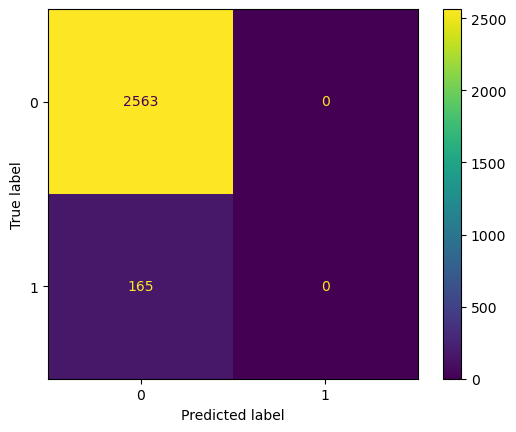

In [26]:
y_pred = model_null.predict(np.ones((len(y_test),1)))
cm = confusion_matrix(y_test, y_pred, labels=model_null.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model_null.classes_)
disp.plot()
plt.show()